In [25]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('HCMST_ver_3.04.csv')

In [27]:
df_features = data[['ppagecat', 'ppeducat', 'ppincimp', 'qflag', 'glbstatus', 'married', 'q24_met_online']] 
df_features.shape

(4002, 7)

In [28]:
df_cleaned = df_features.dropna()
df_cleaned.shape

(2934, 7)

In [29]:
data_array = df_cleaned.to_numpy()

In [30]:
km = KModes(n_clusters=4, init='Huang', random_state=42)
clusters = km.fit_predict(data_array)

In [31]:
df_cleaned.loc[:, 'Cluster'] = clusters
print(df_cleaned)

      ppagecat  ppeducat  ppincimp  qflag  glbstatus  married  q24_met_online  \
0            4         4         7      1          1        0             1.0   
1            2         4        11      1          1        1             0.0   
3            2         3        11      1          1        0             1.0   
6            4         4        17      1          1        0             0.0   
7            5         4         6      1          1        1             0.0   
...        ...       ...       ...    ...        ...      ...             ...   
3995         3         4        17      1          0        1             0.0   
3996         4         1        11      1          0        1             0.0   
3999         4         3        18      1          1        0             1.0   
4000         2         3        13      1          0        1             0.0   
4001         2         4        14      1          0        1             0.0   

      Cluster  
0          

C:\Users\olyas\AppData\Local\Temp\ipykernel_9576\4294952212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'Cluster'] = clusters


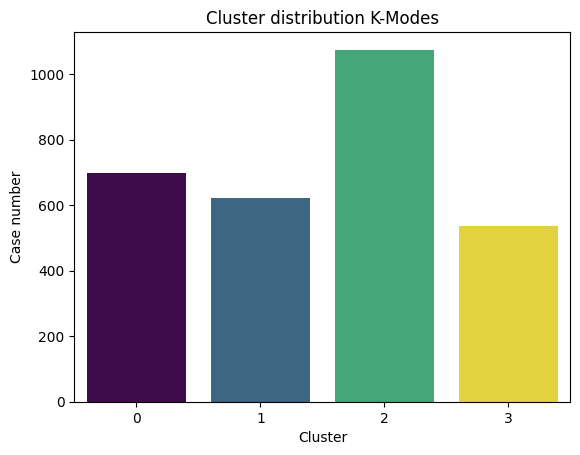

In [32]:
sns.countplot(x="Cluster", data=df_cleaned, hue="Cluster", palette="viridis", legend=False)
plt.xlabel("Cluster")
plt.ylabel("Case number")
plt.title("Cluster distribution K-Modes")
plt.show()


In [33]:
print(df_cleaned.groupby("Cluster").mean())

         ppagecat  ppeducat   ppincimp  qflag  glbstatus   married  \
Cluster                                                              
0        3.974249  3.459227  12.658083    1.0   0.821173  0.231760   
1        3.186196  2.686998  11.208668    1.0   0.051364  0.330658   
2        4.052093  2.274419  11.715349    1.0   0.034419  0.957209   
3        3.160149  3.696462  13.016760    1.0   0.070764  0.899441   

         q24_met_online  
Cluster                  
0              0.187411  
1              0.091493  
2              0.039070  
3              0.074488  


In [34]:
print("Cluster centroids:\n", km.cluster_centroids_)


Cluster centroids:
 [[ 4.  4. 16.  1.  1.  0.  0.]
 [ 1.  3. 13.  1.  0.  0.  0.]
 [ 3.  2. 12.  1.  0.  1.  0.]
 [ 2.  4. 14.  1.  0.  1.  0.]]


In [35]:
df_cleaned['q24_met_online'] = df_cleaned['q24_met_online'].astype(int)
print(df_cleaned[['glbstatus', 'q24_met_online']].dtypes)

glbstatus         int64
q24_met_online    int64
dtype: object


C:\Users\olyas\AppData\Local\Temp\ipykernel_9576\1450667470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['q24_met_online'] = df_cleaned['q24_met_online'].astype(int)


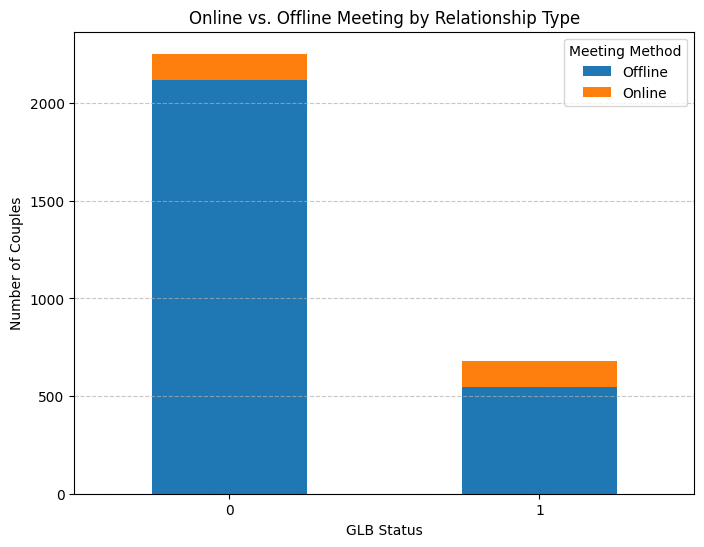

In [36]:
# Count online vs. offline meeting methods for traditional and nontraditional couples
online_meeting_counts = df_cleaned.groupby(['glbstatus',"q24_met_online"])['glbstatus'].count().unstack()

"""# Visualization
online_meeting_counts.plot(kind="bar", stacked=True, figsize=(8, 6))
plt.title("Online vs. Offline Meeting by Relationship Type")
plt.xlabel("GLB Status")
plt.ylabel("Number of Couples")
plt.legend(["Offline", "Online"])
plt.show()"""

online_meeting_counts.plot(kind="bar", stacked=True, figsize=(8, 6), color=["#1f77b4", "#ff7f0e"])
plt.title("Online vs. Offline Meeting by Relationship Type")
plt.xlabel("GLB Status")
plt.ylabel("Number of Couples")
plt.legend(["Offline", "Online"], title="Meeting Method")
plt.xticks(rotation=0)  # Вирівнюємо підписи осі X
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

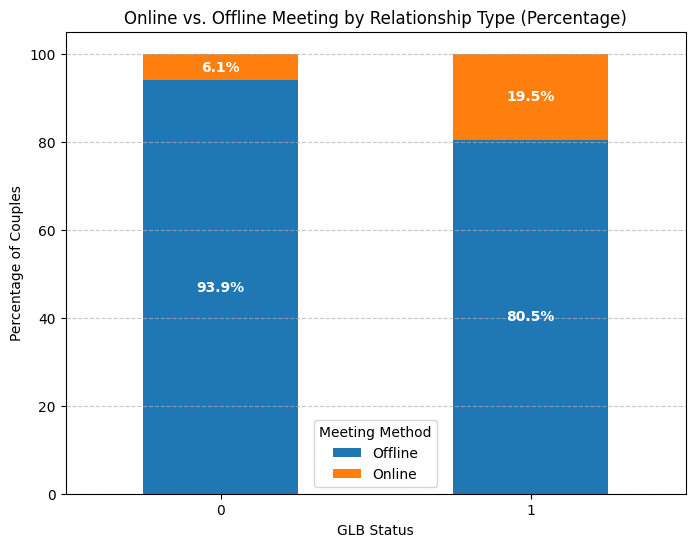

In [37]:
online_meeting_perc = online_meeting_counts.div(online_meeting_counts.sum(axis=1), axis=0) * 100

ax = online_meeting_perc.plot(kind="bar", stacked=True, figsize=(8, 6), color=["#1f77b4", "#ff7f0e"])

plt.title("Online vs. Offline Meeting by Relationship Type (Percentage)")
plt.xlabel("GLB Status")
plt.ylabel("Percentage of Couples")
plt.legend(["Offline", "Online"], title="Meeting Method")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0: 
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + height / 2, 
                f"{height:.1f}%", 
                ha='center', 
                va='center', 
                fontsize=10, 
                color="white",
                fontweight="bold"
            )

plt.show()

In [38]:
df_viz = data[['caseid_new','ppagecat', 'ppeducat', 'ppincimp', 'qflag', 'glbstatus', 'married', 'q24_met_online']] 
df_viz.shape

(4002, 8)

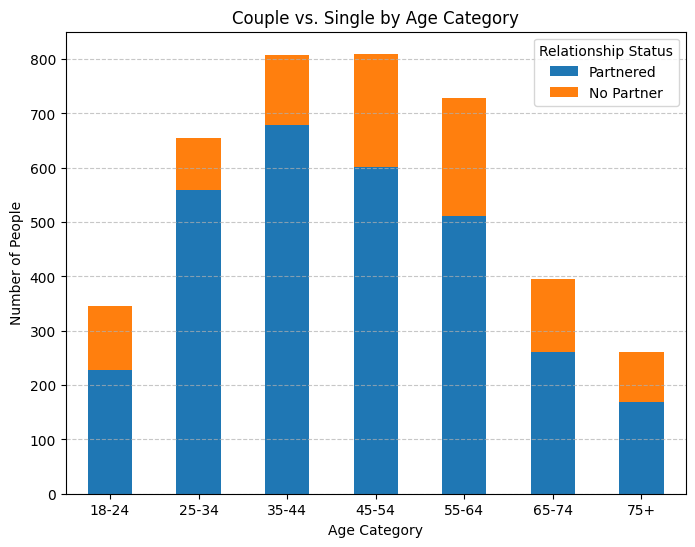

In [46]:
partnered_counts = df_viz.groupby(["ppagecat", "qflag"])["caseid_new"].count().unstack()

ax = partnered_counts.plot(kind="bar", stacked=True, figsize=(8, 6), color=["#1f77b4", "#ff7f0e"])

plt.title("Couple vs. Single by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Number of People")
legend_labels = {1: "Partnered", 2: "No Partner"}
plt.legend([legend_labels[col] for col in partnered_counts.columns], title="Relationship Status")

plt.xticks(ticks=range(len(partnered_counts.index)), labels=["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"], rotation=0)

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

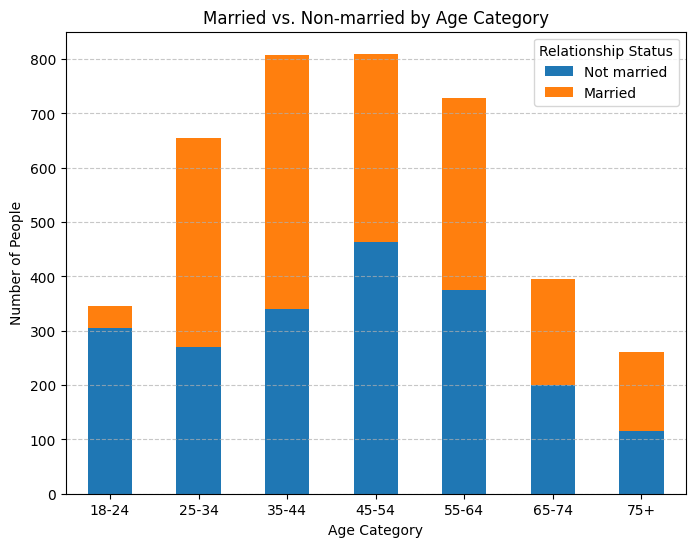

In [47]:
married_counts = df_viz.groupby(["ppagecat", "married"])["caseid_new"].count().unstack()

ax = married_counts.plot(kind="bar", stacked=True, figsize=(8, 6), color=["#1f77b4", "#ff7f0e"])

plt.title("Married vs. Non-married by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Number of People")
legend_labels = {0: "Not married", 1: "Married"}
plt.legend([legend_labels[col] for col in married_counts.columns], title="Relationship Status")

plt.xticks(ticks=range(len(married_counts.index)), labels=["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"], rotation=0)

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()